<a href="https://colab.research.google.com/github/EltonGino/Medical-Data-Visualizer/blob/main/Medical_Data_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/medical_examination.csv')

In [4]:
print(df.head())

   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            1     1      0   
1   1  20228    1     156    85.0    140     90            3     1      0   
2   2  18857    1     165    64.0    130     70            3     1      0   
3   3  17623    2     169    82.0    150    100            1     1      0   
4   4  17474    1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [8]:
# Calcular o BMI
df['BMI'] = df ['weight'] / ((df['height'] / 100) ** 2)

# Adcionar a coluna ovewheight
df['overweight'] = (df['BMI'] > 25).astype(int)
print(df.head())

   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            1     1      0   
1   1  20228    1     156    85.0    140     90            3     1      0   
2   2  18857    1     165    64.0    130     70            3     1      0   
3   3  17623    2     169    82.0    150    100            1     1      0   
4   4  17474    1     156    56.0    100     60            1     1      0   

   alco  active  cardio        BMI  overweight  
0     0       1       0  21.967120           0  
1     0       1       1  34.927679           1  
2     0       0       1  23.507805           0  
3     0       1       1  28.710479           1  
4     0       0       0  23.011177           0  


In [10]:
# Normalizando as colunas colesterol e glu
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
print(df.head())

   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            1     1      0   
1   1  20228    1     156    85.0    140     90            0     1      0   
2   2  18857    1     165    64.0    130     70            0     1      0   
3   3  17623    2     169    82.0    150    100            1     1      0   
4   4  17474    1     156    56.0    100     60            1     1      0   

   alco  active  cardio        BMI  overweight  
0     0       1       0  21.967120           0  
1     0       1       1  34.927679           1  
2     0       0       1  23.507805           0  
3     0       1       1  28.710479           1  
4     0       0       0  23.011177           0  


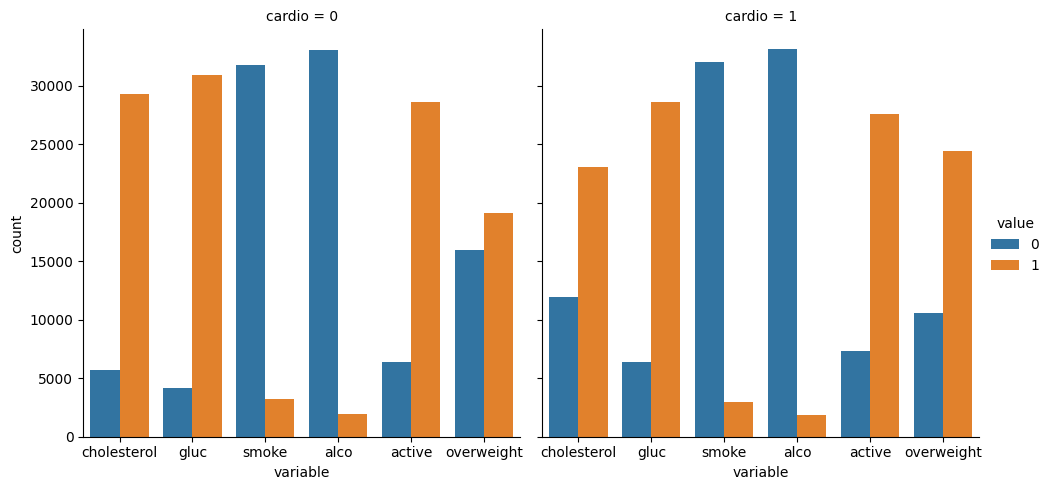

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data for catplot
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

# Create the catplot
sns.catplot(x="variable", hue="value", col="cardio", data=df_cat, kind="count")
plt.show()


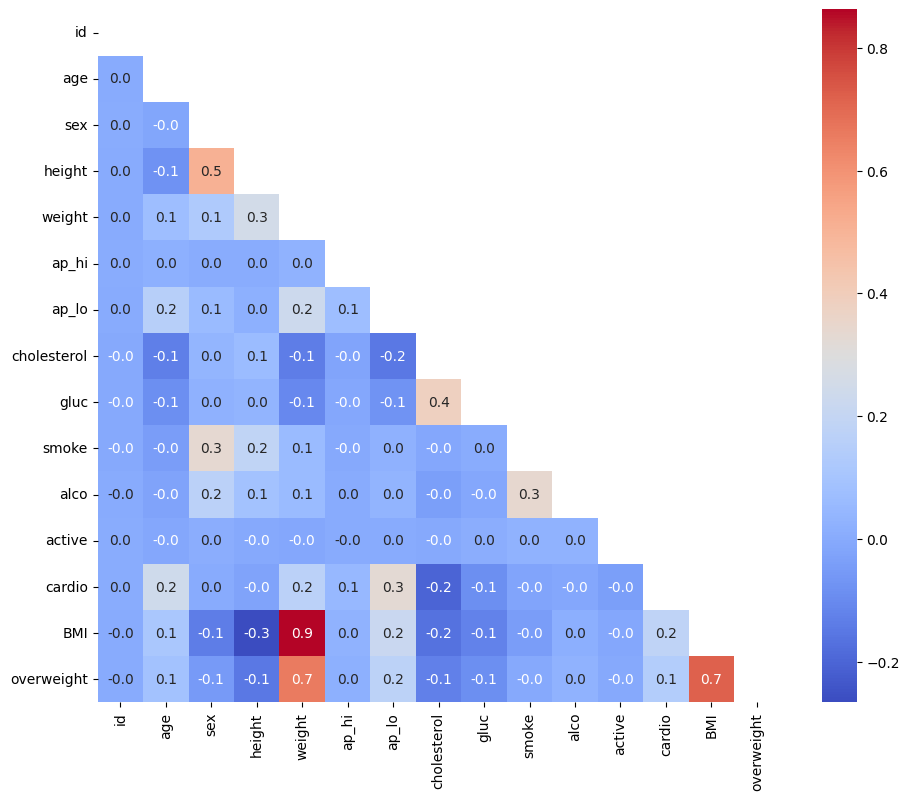

In [12]:
# Clean the data
df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
             (df['height'] >= df['height'].quantile(0.025)) &
             (df['height'] <= df['height'].quantile(0.975)) &
             (df['weight'] >= df['weight'].quantile(0.025)) &
             (df['weight'] <= df['weight'].quantile(0.975))]

# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", ax=ax, cmap="coolwarm")
plt.show()
